In [ ]:
v

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import mean,inf,arange
from numpy import std,var
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
scaler = StandardScaler()

In [3]:
df = pd.read_csv('../../../data/dataset.csv')

In [4]:
len(df)

346

In [5]:
def get_new_target(col):
    return 1 if col == 'V' else 0

In [6]:
df['new_target'] = df['liverpool_result_ft'].apply(get_new_target)

In [7]:
x = df.drop(columns=['liverpool_result_ft','new_target'])

In [8]:
y = df['liverpool_result_ft']

In [9]:
y_new=df['new_target']

In [10]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [11]:
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [12]:
model = RandomForestClassifier()

In [13]:
part = []
mean_acc = []
for i in np.linspace(0.25,0.7,num=20):
    i=round(i,3)
    part.append(1-i)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_new,test_size = i)
    acc = evaluate_model(x_train,y_train,model)
    mean_acc.append(np.mean(acc))

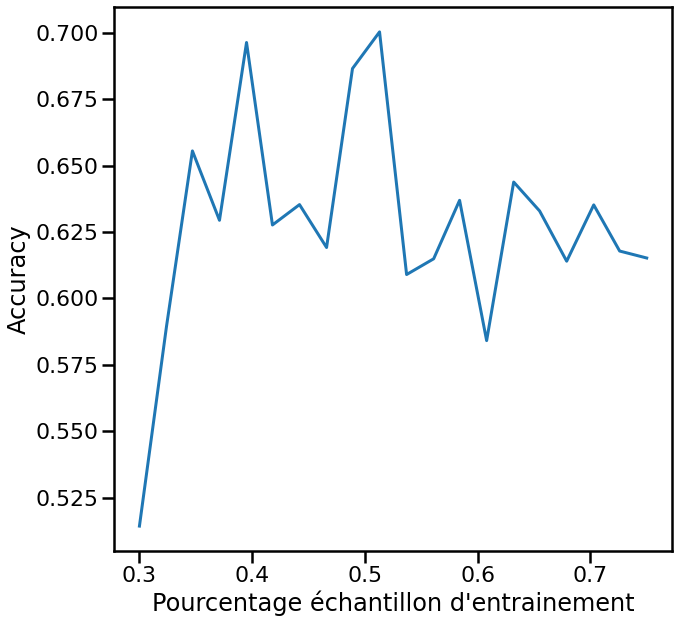

In [14]:
sns.set_context("poster")
f, axs = plt.subplots(1,1,figsize=(10,10))
pl = sns.lineplot(x=part,y=mean_acc)
pl.set(xlabel= "Pourcentage échantillon d'entrainement",ylabel="Accuracy")
plt.savefig('lr_split_pourcentage.jpg')

In [15]:
nb_list = [int(i * len(x_scaled)) for i in part]

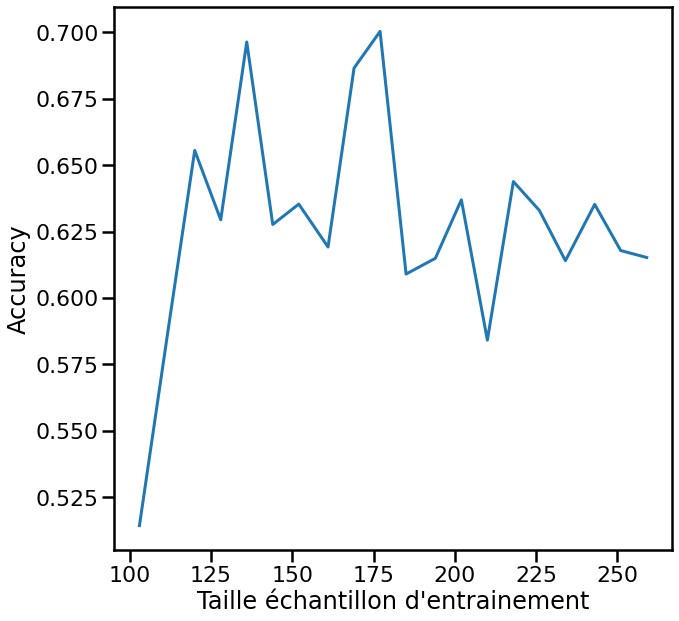

In [16]:
sns.set_context("poster")
f, axs = plt.subplots(1,1,figsize=(10,10))
pl = sns.lineplot(x=nb_list,y=mean_acc)
pl.set(xlabel= "Taille échantillon d'entrainement",ylabel="Accuracy")
plt.savefig('lr_split_nombre.jpg')

# Binary Classification

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_new,test_size = 0.4)

In [12]:
model = LogisticRegression()

In [13]:
model.fit(x_train,y_train)

LogisticRegression()

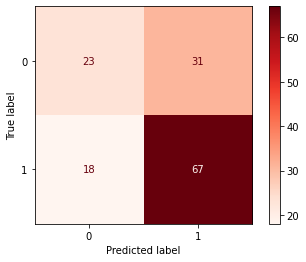

In [14]:
plot_confusion_matrix(model,x_test,y_test,cmap='Reds')
plt.savefig('lr_confusion_matrix_binaire.jpg')

In [15]:
accuracy_score(y_test,model.predict(x_test))

0.6474820143884892

In [16]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.56      0.43      0.48        54
           1       0.68      0.79      0.73        85

    accuracy                           0.65       139
   macro avg       0.62      0.61      0.61       139
weighted avg       0.64      0.65      0.64       139



# Multi Classification

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.3)

In [41]:
model = LogisticRegression()

In [42]:
model.fit(x_train,y_train)

LogisticRegression()

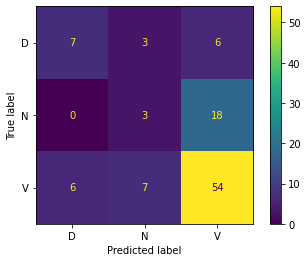

In [44]:
plot_confusion_matrix(model,x_test,y_test)
plt.savefig('lr_confusion_matrix_multi.jpg')

In [21]:
accuracy_score(y_test,model.predict(x_test))

0.5827338129496403

In [22]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           D       0.44      0.38      0.41        21
           N       0.27      0.11      0.16        35
           V       0.65      0.83      0.73        83

    accuracy                           0.58       139
   macro avg       0.45      0.44      0.43       139
weighted avg       0.52      0.58      0.54       139



In [76]:
df_multi = pd.DataFrame(classification_report(y_test,model.predict(x_test)))

ValueError: DataFrame constructor not properly called!

In [31]:
# define grid
grid = dict()
grid['penalty'] =  ['l1', 'l2']
grid['C'] = np.logspace(-4, 4, 20)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [32]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [33]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

In [34]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
13,0.015802,0.001794,0.003731,0.000572,0.0335982,l2,"{'C': 0.03359818286283781, 'penalty': 'l2'}",0.523810,0.690476,0.585366,...,0.707317,0.658537,0.642857,0.571429,0.658537,0.609756,0.634146,0.618622,0.058241,1
17,0.018269,0.001845,0.003932,0.000440,0.233572,l2,"{'C': 0.23357214690901212, 'penalty': 'l2'}",0.547619,0.738095,0.609756,...,0.634146,0.634146,0.619048,0.619048,0.609756,0.585366,0.609756,0.610298,0.057681,2
11,0.017310,0.003508,0.003838,0.000343,0.0127427,l2,"{'C': 0.012742749857031334, 'penalty': 'l2'}",0.595238,0.642857,0.560976,...,0.658537,0.634146,0.619048,0.571429,0.634146,0.609756,0.585366,0.608788,0.030478,3
19,0.020998,0.002638,0.003934,0.000444,0.615848,l2,"{'C': 0.615848211066026, 'penalty': 'l2'}",0.571429,0.738095,0.585366,...,0.634146,0.634146,0.619048,0.595238,0.658537,0.585366,0.609756,0.607162,0.060162,4
15,0.017132,0.002060,0.004001,0.001155,0.0885867,l2,"{'C': 0.08858667904100823, 'penalty': 'l2'}",0.547619,0.666667,0.585366,...,0.658537,0.634146,0.642857,0.595238,0.609756,0.585366,0.609756,0.607162,0.049744,4
21,0.023135,0.003592,0.003733,0.000443,1.62378,l2,"{'C': 1.623776739188721, 'penalty': 'l2'}",0.595238,0.738095,0.536585,...,0.634146,0.658537,0.642857,0.595238,0.658537,0.536585,0.609756,0.603755,0.058647,6
23,0.022924,0.003111,0.003733,0.000443,4.28133,l2,"{'C': 4.281332398719396, 'penalty': 'l2'}",0.595238,0.738095,0.536585,...,0.634146,0.658537,0.642857,0.595238,0.658537,0.536585,0.609756,0.597329,0.066980,7
27,0.027713,0.006821,0.004599,0.001201,29.7635,l2,"{'C': 29.763514416313132, 'penalty': 'l2'}",0.595238,0.761905,0.536585,...,0.634146,0.658537,0.619048,0.595238,0.658537,0.536585,0.609756,0.595703,0.071959,8
25,0.024860,0.004568,0.004056,0.000576,11.2884,l2,"{'C': 11.288378916846883, 'penalty': 'l2'}",0.595238,0.761905,0.536585,...,0.634146,0.658537,0.619048,0.595238,0.658537,0.536585,0.609756,0.595703,0.071959,8
37,0.026601,0.007207,0.005201,0.001869,3792.69,l2,"{'C': 3792.690190732246, 'penalty': 'l2'}",0.595238,0.761905,0.536585,...,0.609756,0.658537,0.619048,0.595238,0.658537,0.536585,0.609756,0.592451,0.073978,10


In [77]:
classification_report(y_test,model.predict(x_test))

'              precision    recall  f1-score   support\n\n           D       0.42      0.40      0.41        25\n           N       0.25      0.13      0.17        31\n           V       0.69      0.82      0.75        83\n\n    accuracy                           0.59       139\n   macro avg       0.45      0.45      0.44       139\nweighted avg       0.54      0.59      0.56       139\n'